In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
#from nltk.corpus import stopwords
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
import re
from google.colab import drive

In [82]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [83]:
df = pd.read_csv ('/content/gdrive/MyDrive/Celonis/labelled_text.csv', encoding='latin-1', names = ['dunno', 'origin', 'sentiment', 'text'])
df = df.sample(frac=1).reset_index(drop=True) #shuffle

In [84]:
df['sentiment'] = df['sentiment'].replace('Neutral' ,'Irrelevant')

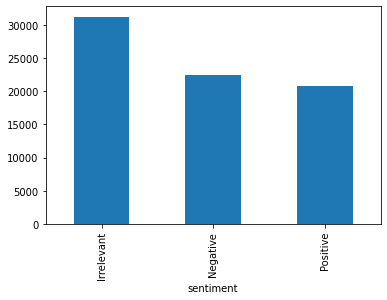

In [85]:
df.groupby(['sentiment']).size().plot(kind = "bar")

# Kaggle dataset

For the purpose of solving the imbalance situation, I searched for more data with similar structure. 

In [87]:
df_train = pd.read_csv("/content/gdrive/MyDrive/Celonis/train.txt",delimiter=';',names=['text','label'])

In [88]:
def custom_encoder(df):
    df.replace(to_replace ="surprise", value ='Positive', inplace=True)
    df.replace(to_replace ="love", value ='Positive', inplace=True)
    df.replace(to_replace ="joy", value ='Positive', inplace=True)
    df.replace(to_replace ="fear", value ='Negative', inplace=True)
    df.replace(to_replace ="anger", value ='Negative', inplace=True)
    df.replace(to_replace ="sadness", value ='Negative', inplace=True)

In [90]:
custom_encoder(df_train['label'])

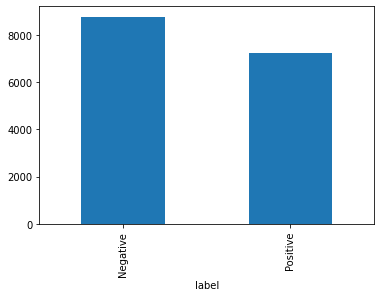

In [92]:
df_train.groupby(['label']).size().plot(kind = "bar")

In [93]:
df_train.columns

Index(['text', 'label'], dtype='object')

In [94]:
df_train.columns = df_train.columns.str.replace('label', 'sentiment')
frames = [df_train, df]
result = pd.concat (frames)

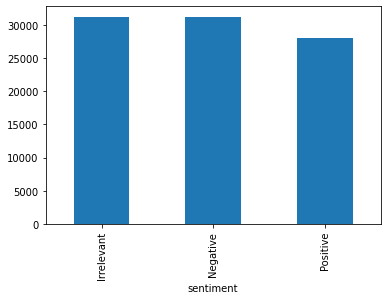

In [95]:
result.groupby(['sentiment']).size().plot(kind = "bar")

Solved. I know have another training dataset with more vocabulary and a less problematic imbalance situation.

In [96]:
result.to_csv ('pluskaggle.csv', index = False)

Movies

Before trying with the kaggle dataset I analyzed a movies dataset but the structure of the sentences differed (for example length of the sentences. Mix of positive and negative words in the same context, etc.) and therefore after some analysis I chose the dataset mentioned above. 